## Introduction to Deep Learning with Tensorflow

In [1]:
## from pytorch to tensorflow
import os
import sys
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from pycrayon import (
    CrayonClient,
)

from IPython import (
    display,
)

from IPython.display import (
    Image,
    clear_output,
)

# get matplotlib configuration
%matplotlib inline
%run plot_conf.py

ERROR:root:File `'plot_conf.py'` not found.


In [72]:
import tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__) 

2.0.0


## Create the data

In [4]:
seed=12345
random.seed(seed)
tf.random.set_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units
#tf.enable_eager_execution()
tf.executing_eagerly()


True

In [15]:
X, y = [], []

for i in range(C):
    index = 0
    r = np.linspace(0., 1., N)
    t = np.linspace(
        i * 2 * math.pi / C,
        (i + 2) * 2 * math.pi / C,
        N
    ) + np.random.normal(size=t.shape) * 0.1
    for ix in range(N * i, N * (i + 1)):
        X.append(r[index] * np.array([math.sin(t[index]), math.cos(t[index])]))
        y.append(i)
        index += 1

X = tf.stack(X)
y = tf.stack(y)
print("SHAPES:")
print("-------------------")
print("X:", tuple(X.shape))
print("y:", tuple(y.shape))

SHAPES:
-------------------
X: (3000, 2)
y: (3000,)


In [7]:
#tf.constant?
tf.as_dtype(np.dtype("<f4"))

tf.float32

In [8]:
def plot_data(X, y, d=.0, auto=False):
    """
    Plot the data.
    """
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    if auto is True: plt.axis('equal')
#     plt.savefig('spiral{:.2f}.png'.format(d))

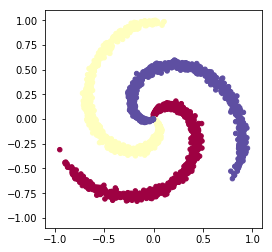

In [9]:
# Create the data
plot_data(X,y)

In [10]:
def plot_model(X, y, model, e=.0, auto=False):
    X = X.numpy()
    y = y.numpy()
    w1 = model.layers[0].get_weights()[0]
    b1 = model.layers[0].get_weights()[1]
    w2 = model.layers[1].get_weights()[0]
    b2 = model.layers[1].get_weights()[1]
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    if auto is True:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')
    if auto is True:
        plt.axis((xx.min(), xx.max(), yy.min(), yy.max()))

## Linear model 

In [11]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [85]:
# Linear model

class linear_model(tf.keras.Model):
    
    def __init__(self, D_in, H, D_out):
        super(linear_model, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='linear')
        self.dense2 = tf.keras.layers.Dense(D_out, activation='linear')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

In [91]:
model = linear_model((4000,2), H, C)
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer, loss = tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
history = model.fit(X, y, epochs=999)

Train on 3000 samples
Epoch 1/999
3000/3000 [==============================] - 0s 128us/sample - loss: 1.5030 - accuracy: 0.2570
Epoch 2/999
3000/3000 [==============================] - 0s 33us/sample - loss: 1.2186 - accuracy: 0.3170
Epoch 3/999
3000/3000 [==============================] - 0s 36us/sample - loss: 1.0186 - accuracy: 0.3697
Epoch 4/999
3000/3000 [==============================] - 0s 32us/sample - loss: 0.8778 - accuracy: 0.4133
Epoch 5/999
3000/3000 [==============================] - 0s 32us/sample - loss: 0.7788 - accuracy: 0.4240
Epoch 6/999
3000/3000 [==============================] - 0s 34us/sample - loss: 0.7097 - accuracy: 0.4270
Epoch 7/999
3000/3000 [==============================] - 0s 32us/sample - loss: 0.6615 - accuracy: 0.4233
Epoch 8/999
3000/3000 [==============================] - 0s 35us/sample - loss: 0.6274 - accuracy: 0.4097
Epoch 9/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.6031 - accuracy: 0.3927
Epoch 10/999
3000/3000 

3000/3000 [==============================] - 0s 40us/sample - loss: 0.4878 - accuracy: 0.1673
Epoch 77/999
3000/3000 [==============================] - 0s 41us/sample - loss: 0.4878 - accuracy: 0.1690
Epoch 78/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.1560
Epoch 79/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4878 - accuracy: 0.1507
Epoch 80/999
3000/3000 [==============================] - 0s 41us/sample - loss: 0.4878 - accuracy: 0.1480
Epoch 81/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4878 - accuracy: 0.1560
Epoch 82/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.1637
Epoch 83/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4878 - accuracy: 0.1457
Epoch 84/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4878 - accuracy: 0.1517
Epoch 85/999
3000/3000 [==========================

3000/3000 [==============================] - 0s 38us/sample - loss: 0.4877 - accuracy: 0.4150
Epoch 153/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4877 - accuracy: 0.0993
Epoch 154/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4878 - accuracy: 0.1910
Epoch 155/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4878 - accuracy: 0.3480
Epoch 156/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4878 - accuracy: 0.2020
Epoch 157/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878 - accuracy: 0.1580
Epoch 158/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4878 - accuracy: 0.3960
Epoch 159/999
3000/3000 [==============================] - 0s 39us/sample - loss: 0.4878 - accuracy: 0.3207
Epoch 160/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4878 - accuracy: 0.1317
Epoch 161/999
3000/3000 [=================

Epoch 228/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4878 - accuracy: 0.4740
Epoch 229/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4877 - accuracy: 0.1277
Epoch 230/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4878 - accuracy: 0.2130
Epoch 231/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878 - accuracy: 0.1173
Epoch 232/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878 - accuracy: 0.5297
Epoch 233/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878 - accuracy: 0.9240
Epoch 234/999
3000/3000 [==============================] - 0s 34us/sample - loss: 0.4878 - accuracy: 0.5900
Epoch 235/999
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878 - accuracy: 0.2967
Epoch 236/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4877 - accuracy: 0.0033
Epoch 237/999
3000/3000 [===

3000/3000 [==============================] - 0s 40us/sample - loss: 0.4878 - accuracy: 0.8717
Epoch 304/999
3000/3000 [==============================] - 0s 54us/sample - loss: 0.4878 - accuracy: 0.3537
Epoch 305/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4878 - accuracy: 0.4367
Epoch 306/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4878 - accuracy: 0.5377
Epoch 307/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.7380
Epoch 308/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.5293
Epoch 309/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.7250
Epoch 310/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4878 - accuracy: 0.5400
Epoch 311/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4877 - accuracy: 0.9387
Epoch 312/999
3000/3000 [=================

3000/3000 [==============================] - 0s 51us/sample - loss: 0.4877 - accuracy: 0.7460
Epoch 379/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.3773
Epoch 380/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.9423
Epoch 381/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.0653
Epoch 382/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.5040
Epoch 383/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.5890
Epoch 384/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.4370
Epoch 385/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4877 - accuracy: 0.8603
Epoch 386/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.1913
Epoch 387/999
3000/3000 [=================

3000/3000 [==============================] - 0s 40us/sample - loss: 0.4878 - accuracy: 0.2450
Epoch 454/999
3000/3000 [==============================] - 0s 39us/sample - loss: 0.4878 - accuracy: 0.7077
Epoch 455/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4878 - accuracy: 0.7087
Epoch 456/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4878 - accuracy: 0.1997
Epoch 457/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4877 - accuracy: 0.7407
Epoch 458/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4878 - accuracy: 0.1353
Epoch 459/999
3000/3000 [==============================] - 0s 37us/sample - loss: 0.4877 - accuracy: 0.4690
Epoch 460/999
3000/3000 [==============================] - 0s 38us/sample - loss: 0.4877 - accuracy: 0.6337
Epoch 461/999
3000/3000 [==============================] - 0s 39us/sample - loss: 0.4877 - accuracy: 0.0387
Epoch 462/999
3000/3000 [=================

Epoch 529/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4878 - accuracy: 0.2050
Epoch 530/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.6173
Epoch 531/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.3527
Epoch 532/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.6903
Epoch 533/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4878 - accuracy: 0.6347
Epoch 534/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.9647
Epoch 535/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.1610
Epoch 536/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.8100
Epoch 537/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.4877
Epoch 538/999
3000/3000 [===

3000/3000 [==============================] - 0s 48us/sample - loss: 0.4878 - accuracy: 0.6503
Epoch 605/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4877 - accuracy: 0.2157
Epoch 606/999
3000/3000 [==============================] - 0s 42us/sample - loss: 0.4878 - accuracy: 0.1673
Epoch 607/999
3000/3000 [==============================] - 0s 52us/sample - loss: 0.4877 - accuracy: 0.6340
Epoch 608/999
3000/3000 [==============================] - 0s 49us/sample - loss: 0.4878 - accuracy: 0.1817
Epoch 609/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4878 - accuracy: 0.5190
Epoch 610/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.1903
Epoch 611/999
3000/3000 [==============================] - 0s 49us/sample - loss: 0.4878 - accuracy: 0.7353
Epoch 612/999
3000/3000 [==============================] - 0s 59us/sample - loss: 0.4878 - accuracy: 0.8360
Epoch 613/999
3000/3000 [=================

Epoch 680/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.6253
Epoch 681/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.6367
Epoch 682/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.6980
Epoch 683/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4877 - accuracy: 0.3847
Epoch 684/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4878 - accuracy: 0.0350
Epoch 685/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.3500
Epoch 686/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.3093
Epoch 687/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.8010
Epoch 688/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.5273
Epoch 689/999
3000/3000 [===

3000/3000 [==============================] - 0s 51us/sample - loss: 0.4877 - accuracy: 0.7230
Epoch 756/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4878 - accuracy: 0.6723
Epoch 757/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.3980
Epoch 758/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.5993
Epoch 759/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.7553
Epoch 760/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4877 - accuracy: 0.3153
Epoch 761/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.3160
Epoch 762/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.6883
Epoch 763/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4877 - accuracy: 0.3747
Epoch 764/999
3000/3000 [=================

Epoch 831/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4877 - accuracy: 0.5123
Epoch 832/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.7457
Epoch 833/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4877 - accuracy: 0.5330
Epoch 834/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.9627
Epoch 835/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4878 - accuracy: 0.2387
Epoch 836/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4877 - accuracy: 0.8900
Epoch 837/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.0967
Epoch 838/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4878 - accuracy: 0.6673
Epoch 839/999
3000/3000 [==============================] - 0s 43us/sample - loss: 0.4877 - accuracy: 0.2760
Epoch 840/999
3000/3000 [===

3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.4750
Epoch 907/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.7957
Epoch 908/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4878 - accuracy: 0.6857
Epoch 909/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4877 - accuracy: 0.6993
Epoch 910/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.0440
Epoch 911/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4878 - accuracy: 0.0373
Epoch 912/999
3000/3000 [==============================] - 0s 47us/sample - loss: 0.4877 - accuracy: 0.0633
Epoch 913/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4877 - accuracy: 0.6300
Epoch 914/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.9420
Epoch 915/999
3000/3000 [=================

Epoch 982/999
3000/3000 [==============================] - 0s 48us/sample - loss: 0.4878 - accuracy: 0.3147
Epoch 983/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.2557
Epoch 984/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.9297
Epoch 985/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.3157
Epoch 986/999
3000/3000 [==============================] - 0s 50us/sample - loss: 0.4878 - accuracy: 0.0947
Epoch 987/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.4330
Epoch 988/999
3000/3000 [==============================] - 0s 46us/sample - loss: 0.4877 - accuracy: 0.9217
Epoch 989/999
3000/3000 [==============================] - 0s 45us/sample - loss: 0.4878 - accuracy: 0.3940
Epoch 990/999
3000/3000 [==============================] - 0s 44us/sample - loss: 0.4877 - accuracy: 0.6413
Epoch 991/999
3000/3000 [===

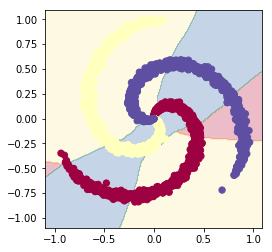

In [98]:
# Plot trained model
print(model)
plot_model(X, y, model)

## Two-layered network

In [99]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [100]:
class two_layer_network(tf.keras.Model):
    """
    NN model.
    """
    def __init__(self, D_in, H, D_out):
        """
        Initialize weights.
        """
        super(two_layer_network, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='relu')
        self.dense2 = tf.keras.layers.Dense(D_out)
    

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)
        

In [101]:
two_layer_model = two_layer_network((3000,2), H, C)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

two_layer_model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
two_layer_model.fit(X, y, epochs=999)

Train on 3000 samples
Epoch 1/999
3000/3000 [==============================] - 1s 173us/sample - loss: 4.3882
Epoch 2/999
3000/3000 [==============================] - 0s 40us/sample - loss: 3.3017
Epoch 3/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2980
Epoch 4/999
3000/3000 [==============================] - 0s 38us/sample - loss: 3.2972
Epoch 5/999
3000/3000 [==============================] - 0s 38us/sample - loss: 3.2968
Epoch 6/999
3000/3000 [==============================] - 0s 40us/sample - loss: 3.2966
Epoch 7/999
3000/3000 [==============================] - 0s 43us/sample - loss: 3.2965
Epoch 8/999
3000/3000 [==============================] - 0s 40us/sample - loss: 3.2963
Epoch 9/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2962
Epoch 10/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2962
Epoch 11/999
3000/3000 [==============================] - 0s 40us/sample - loss: 3.2961
Epoch 12/999
3000/

Epoch 94/999
3000/3000 [==============================] - 0s 51us/sample - loss: 3.2958
Epoch 95/999
3000/3000 [==============================] - 0s 63us/sample - loss: 3.2958
Epoch 96/999
3000/3000 [==============================] - 0s 55us/sample - loss: 3.2958
Epoch 97/999
3000/3000 [==============================] - 0s 53us/sample - loss: 3.2958
Epoch 98/999
3000/3000 [==============================] - 0s 57us/sample - loss: 3.2959
Epoch 99/999
3000/3000 [==============================] - 0s 55us/sample - loss: 3.2959
Epoch 100/999
3000/3000 [==============================] - 0s 54us/sample - loss: 3.2958
Epoch 101/999
3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 102/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 103/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 104/999
3000/3000 [==============================] - 0s 49us/sample - loss: 3.2958
Epoch 105/999
3000/3000 [==

3000/3000 [==============================] - 0s 59us/sample - loss: 3.2958
Epoch 187/999
3000/3000 [==============================] - 0s 62us/sample - loss: 3.2958
Epoch 188/999
3000/3000 [==============================] - 0s 55us/sample - loss: 3.2958
Epoch 189/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 190/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 191/999
3000/3000 [==============================] - 0s 44us/sample - loss: 3.2958
Epoch 192/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 193/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 194/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 195/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2959
Epoch 196/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 197/999
3000/3000 [==========

3000/3000 [==============================] - 0s 51us/sample - loss: 3.2958
Epoch 279/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 280/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 281/999
3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 282/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 283/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 284/999
3000/3000 [==============================] - 0s 49us/sample - loss: 3.2958
Epoch 285/999
3000/3000 [==============================] - 0s 54us/sample - loss: 3.2958
Epoch 286/999
3000/3000 [==============================] - 0s 56us/sample - loss: 3.2958
Epoch 287/999
3000/3000 [==============================] - 0s 56us/sample - loss: 3.2958
Epoch 288/999
3000/3000 [==============================] - 0s 49us/sample - loss: 3.2958
Epoch 289/999
3000/3000 [==========

Epoch 370/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 371/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 372/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 373/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 374/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 375/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 376/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 377/999
3000/3000 [==============================] - 0s 44us/sample - loss: 3.2958
Epoch 378/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 379/999
3000/3000 [==============================] - 0s 44us/sample - loss: 3.2958
Epoch 380/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 381/999
3000/30

3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 462/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 463/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 464/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 465/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 466/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 467/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 468/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 469/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 470/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 471/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 472/999
3000/3000 [==========

3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 554/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 555/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 556/999
3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 557/999
3000/3000 [==============================] - 0s 51us/sample - loss: 3.2958
Epoch 558/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 559/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 560/999
3000/3000 [==============================] - 0s 52us/sample - loss: 3.2958
Epoch 561/999
3000/3000 [==============================] - 0s 49us/sample - loss: 3.2958
Epoch 562/999
3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 563/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 564/999
3000/3000 [==========

3000/3000 [==============================] - 0s 50us/sample - loss: 3.2958
Epoch 645/999
3000/3000 [==============================] - 0s 51us/sample - loss: 3.2958
Epoch 646/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 647/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 648/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 649/999
3000/3000 [==============================] - 0s 44us/sample - loss: 3.2958
Epoch 650/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 651/999
3000/3000 [==============================] - 0s 46us/sample - loss: 3.2958
Epoch 652/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 653/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 654/999
3000/3000 [==============================] - 0s 45us/sample - loss: 3.2958
Epoch 655/999
3000/3000 [==========

3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 737/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 738/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 739/999
3000/3000 [==============================] - 0s 49us/sample - loss: 3.2958
Epoch 740/999
3000/3000 [==============================] - 0s 48us/sample - loss: 3.2958
Epoch 741/999
3000/3000 [==============================] - 0s 47us/sample - loss: 3.2958
Epoch 742/999
3000/3000 [==============================] - 0s 62us/sample - loss: 3.2958
Epoch 743/999
3000/3000 [==============================] - 0s 62us/sample - loss: 3.2958
Epoch 744/999
3000/3000 [==============================] - 0s 64us/sample - loss: 3.2958
Epoch 745/999
3000/3000 [==============================] - 0s 57us/sample - loss: 3.2958
Epoch 746/999
3000/3000 [==============================] - 0s 51us/sample - loss: 3.2958
Epoch 747/999
3000/3000 [==========

3000/3000 [==============================] - 0s 43us/sample - loss: 3.2958
Epoch 829/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 830/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 831/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 832/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 833/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 834/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 835/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 836/999
3000/3000 [==============================] - 0s 56us/sample - loss: 3.2958
Epoch 837/999
3000/3000 [==============================] - 0s 57us/sample - loss: 3.2958
Epoch 838/999
3000/3000 [==============================] - 0s 58us/sample - loss: 3.2958
Epoch 839/999
3000/3000 [==========

3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 921/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 922/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 923/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 924/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 925/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 926/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 927/999
3000/3000 [==============================] - 0s 43us/sample - loss: 3.2958
Epoch 928/999
3000/3000 [==============================] - 0s 42us/sample - loss: 3.2958
Epoch 929/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 930/999
3000/3000 [==============================] - 0s 41us/sample - loss: 3.2958
Epoch 931/999
3000/3000 [==========

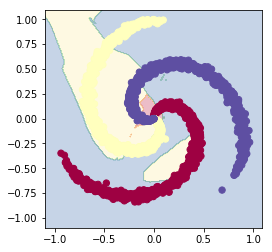

In [102]:
# Plot trained model
print(model)
plot_model(X, y, two_layer_model)


## Proper training procedure
Create datasets

In [103]:
split_ratio = 0.8 # train-test split
num_epochs = 100
batch_size = 64
log_every = 25

In [105]:
# Shuffle and split the data
training = random.sample(range(X.shape[0]), int(X.shape[0] * split_ratio))
testing = [i for i in range(X.shape[0]) if not i in training]
set(testing).intersection(set(training))
X_train = tf.convert_to_tensor(X.numpy()[training,:])
X_test = tf.convert_to_tensor(X.numpy()[testing,:])
y_train = tf.convert_to_tensor(y.numpy()[training])
y_test = tf.convert_to_tensor(y.numpy()[testing])
print("We have %i train samples and %i test samples." % (len(training), len(testing)))

We have 2400 train samples and 600 test samples.


### Training

In [107]:
learning_rate = 1e-3
lambda_l2 = 1e-5
dropout_p = 0.1
decay_rate = 0.9999
max_grad_norm = 5.0

In [132]:
class customized_network(tf.keras.Model):
    
    def __init__(self, D_in, H, D_out):
        super(customized_network, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='relu')
        self.dense2 = tf.keras.layers.Dense(D_out, activation='softmax')
        self.dropout = tf.keras.layers.Dropout(0.1)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dropout(x)
        return self.dense2(x)

In [133]:
customized_network_model = customized_network(X_train.shape, H, C)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
from keras import metrics
customized_network_model.compile(optimizer,loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = customized_network_model.fit(X_train, y_train, epochs=999, validation_data = (X_test, y_test), shuffle=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/999
2400/2400 [==============================] - 1s 255us/sample - loss: 3.2760 - accuracy: 0.2229 - val_loss: 3.3989 - val_accuracy: 0.2650
Epoch 2/999
2400/2400 [==============================] - 0s 53us/sample - loss: 3.2843 - accuracy: 0.1887 - val_loss: 3.4122 - val_accuracy: 0.0917
Epoch 3/999
2400/2400 [==============================] - 0s 54us/sample - loss: 3.3126 - accuracy: 0.0858 - val_loss: 3.4311 - val_accuracy: 0.0383
Epoch 4/999
2400/2400 [==============================] - 0s 56us/sample - loss: 3.3388 - accuracy: 0.1192 - val_loss: 3.4267 - val_accuracy: 0.0533
Epoch 5/999
2400/2400 [==============================] - 0s 55us/sample - loss: 3.3623 - accuracy: 0.1621 - val_loss: 3.4194 - val_accuracy: 0.0683
Epoch 6/999
2400/2400 [==============================] - 0s 54us/sample - loss: 3.3905 - accuracy: 0.2250 - val_loss: 3.4207 - val_accuracy: 0.1367
Epoch 7/999
2400/2400 [==============================] - 0s 57us

2400/2400 [==============================] - 0s 53us/sample - loss: 7.6703 - accuracy: 0.3304 - val_loss: 3.4415 - val_accuracy: 0.1417
Epoch 56/999
2400/2400 [==============================] - 0s 55us/sample - loss: 7.6260 - accuracy: 0.3283 - val_loss: 3.4539 - val_accuracy: 0.1383
Epoch 57/999
2400/2400 [==============================] - 0s 66us/sample - loss: 7.5486 - accuracy: 0.3183 - val_loss: 3.4359 - val_accuracy: 0.1783
Epoch 58/999
2400/2400 [==============================] - 0s 62us/sample - loss: 7.6337 - accuracy: 0.3333 - val_loss: 3.5016 - val_accuracy: 0.0583
Epoch 59/999
2400/2400 [==============================] - 0s 56us/sample - loss: 7.8151 - accuracy: 0.3267 - val_loss: 3.4659 - val_accuracy: 0.0600
Epoch 60/999
2400/2400 [==============================] - 0s 56us/sample - loss: 7.8152 - accuracy: 0.3308 - val_loss: 3.4333 - val_accuracy: 0.1517
Epoch 61/999
2400/2400 [==============================] - 0s 61us/sample - loss: 7.8819 - accuracy: 0.3317 - val_loss: 

Epoch 110/999
2400/2400 [==============================] - 0s 73us/sample - loss: 12.0043 - accuracy: 0.3329 - val_loss: 3.4922 - val_accuracy: 0.0717
Epoch 111/999
2400/2400 [==============================] - 0s 74us/sample - loss: 12.0867 - accuracy: 0.3308 - val_loss: 3.4849 - val_accuracy: 0.0617
Epoch 112/999
2400/2400 [==============================] - 0s 72us/sample - loss: 12.3448 - accuracy: 0.3250 - val_loss: 3.8105 - val_accuracy: 0.0583
Epoch 113/999
2400/2400 [==============================] - 0s 76us/sample - loss: 12.3969 - accuracy: 0.3229 - val_loss: 3.6632 - val_accuracy: 0.0600
Epoch 114/999
2400/2400 [==============================] - 0s 72us/sample - loss: 12.4385 - accuracy: 0.3200 - val_loss: 3.4589 - val_accuracy: 0.0750
Epoch 115/999
2400/2400 [==============================] - 0s 79us/sample - loss: 12.7560 - accuracy: 0.3321 - val_loss: 3.6008 - val_accuracy: 0.0583
Epoch 116/999
2400/2400 [==============================] - 0s 71us/sample - loss: 12.9846 - ac

2400/2400 [==============================] - 0s 66us/sample - loss: 16.3217 - accuracy: 0.3300 - val_loss: 3.5888 - val_accuracy: 0.0583
Epoch 165/999
2400/2400 [==============================] - 0s 70us/sample - loss: 16.7960 - accuracy: 0.3346 - val_loss: 3.8611 - val_accuracy: 0.0617
Epoch 166/999
2400/2400 [==============================] - 0s 70us/sample - loss: 16.6184 - accuracy: 0.3283 - val_loss: 3.5516 - val_accuracy: 0.0617
Epoch 167/999
2400/2400 [==============================] - 0s 68us/sample - loss: 16.5786 - accuracy: 0.3375 - val_loss: 3.7289 - val_accuracy: 0.0533
Epoch 168/999
2400/2400 [==============================] - 0s 66us/sample - loss: 17.2737 - accuracy: 0.3233 - val_loss: 3.7921 - val_accuracy: 0.0517
Epoch 169/999
2400/2400 [==============================] - 0s 68us/sample - loss: 16.7165 - accuracy: 0.3321 - val_loss: 3.4421 - val_accuracy: 0.2100
Epoch 170/999
2400/2400 [==============================] - 0s 70us/sample - loss: 16.6120 - accuracy: 0.3321

2400/2400 [==============================] - 0s 79us/sample - loss: 20.9870 - accuracy: 0.3258 - val_loss: 3.9161 - val_accuracy: 0.0633
Epoch 219/999
2400/2400 [==============================] - 0s 73us/sample - loss: 20.6543 - accuracy: 0.3221 - val_loss: 3.5712 - val_accuracy: 0.0617
Epoch 220/999
2400/2400 [==============================] - 0s 73us/sample - loss: 20.3650 - accuracy: 0.3267 - val_loss: 3.6708 - val_accuracy: 0.0400
Epoch 221/999
2400/2400 [==============================] - 0s 76us/sample - loss: 20.1262 - accuracy: 0.3267 - val_loss: 3.7246 - val_accuracy: 0.0617
Epoch 222/999
2400/2400 [==============================] - 0s 97us/sample - loss: 20.6197 - accuracy: 0.3346 - val_loss: 3.9666 - val_accuracy: 0.0083
Epoch 223/999
2400/2400 [==============================] - 0s 92us/sample - loss: 20.3453 - accuracy: 0.3200 - val_loss: 3.5731 - val_accuracy: 0.0600
Epoch 224/999
2400/2400 [==============================] - 0s 90us/sample - loss: 21.1071 - accuracy: 0.3275

2400/2400 [==============================] - 0s 108us/sample - loss: 23.3491 - accuracy: 0.3346 - val_loss: 3.5901 - val_accuracy: 0.0567
Epoch 273/999
2400/2400 [==============================] - 0s 92us/sample - loss: 24.0701 - accuracy: 0.3296 - val_loss: 4.6335 - val_accuracy: 0.0617
Epoch 274/999
2400/2400 [==============================] - 0s 91us/sample - loss: 23.9014 - accuracy: 0.3217 - val_loss: 3.5536 - val_accuracy: 0.2583
Epoch 275/999
2400/2400 [==============================] - 0s 97us/sample - loss: 24.5010 - accuracy: 0.3317 - val_loss: 3.6148 - val_accuracy: 0.0533
Epoch 276/999
2400/2400 [==============================] - 0s 83us/sample - loss: 24.5376 - accuracy: 0.3233 - val_loss: 3.5219 - val_accuracy: 0.7583
Epoch 277/999
2400/2400 [==============================] - 0s 80us/sample - loss: 23.8311 - accuracy: 0.3283 - val_loss: 3.5598 - val_accuracy: 0.0750
Epoch 278/999
2400/2400 [==============================] - 0s 84us/sample - loss: 25.6916 - accuracy: 0.332

Epoch 326/999
2400/2400 [==============================] - 0s 73us/sample - loss: 27.2980 - accuracy: 0.3262 - val_loss: 3.5634 - val_accuracy: 0.0000e+00
Epoch 327/999
2400/2400 [==============================] - 0s 82us/sample - loss: 26.8494 - accuracy: 0.3233 - val_loss: 3.9640 - val_accuracy: 0.0033
Epoch 328/999
2400/2400 [==============================] - 0s 85us/sample - loss: 26.3439 - accuracy: 0.3267 - val_loss: 4.5957 - val_accuracy: 0.0617
Epoch 329/999
2400/2400 [==============================] - 0s 78us/sample - loss: 26.2464 - accuracy: 0.3279 - val_loss: 3.8409 - val_accuracy: 0.0000e+00
Epoch 330/999
2400/2400 [==============================] - 0s 80us/sample - loss: 27.5584 - accuracy: 0.3212 - val_loss: 4.9228 - val_accuracy: 0.0300
Epoch 331/999
2400/2400 [==============================] - 0s 79us/sample - loss: 27.5080 - accuracy: 0.3454 - val_loss: 4.1562 - val_accuracy: 0.0000e+00
Epoch 332/999
2400/2400 [==============================] - 0s 81us/sample - loss: 

Epoch 380/999
2400/2400 [==============================] - 0s 84us/sample - loss: 30.2431 - accuracy: 0.3354 - val_loss: 4.9458 - val_accuracy: 0.0383
Epoch 381/999
2400/2400 [==============================] - 0s 85us/sample - loss: 30.4817 - accuracy: 0.3275 - val_loss: 4.3621 - val_accuracy: 0.8200
Epoch 382/999
2400/2400 [==============================] - 0s 86us/sample - loss: 29.9772 - accuracy: 0.3300 - val_loss: 4.0020 - val_accuracy: 0.0567
Epoch 383/999
2400/2400 [==============================] - 0s 86us/sample - loss: 30.2733 - accuracy: 0.3308 - val_loss: 5.5317 - val_accuracy: 0.0383
Epoch 384/999
2400/2400 [==============================] - 0s 88us/sample - loss: 29.7046 - accuracy: 0.3383 - val_loss: 3.8834 - val_accuracy: 0.0000e+00
Epoch 385/999
2400/2400 [==============================] - 0s 79us/sample - loss: 29.7838 - accuracy: 0.3246 - val_loss: 3.5882 - val_accuracy: 0.0000e+00
Epoch 386/999
2400/2400 [==============================] - 0s 76us/sample - loss: 29.1

Epoch 434/999
2400/2400 [==============================] - 0s 65us/sample - loss: 32.4485 - accuracy: 0.3196 - val_loss: 4.3505 - val_accuracy: 0.0617
Epoch 435/999
2400/2400 [==============================] - 0s 68us/sample - loss: 33.3274 - accuracy: 0.3296 - val_loss: 5.0499 - val_accuracy: 0.0500
Epoch 436/999
2400/2400 [==============================] - 0s 65us/sample - loss: 33.3722 - accuracy: 0.3233 - val_loss: 3.9207 - val_accuracy: 0.0400
Epoch 437/999
2400/2400 [==============================] - 0s 67us/sample - loss: 32.2676 - accuracy: 0.3425 - val_loss: 4.3494 - val_accuracy: 0.0000e+00
Epoch 438/999
2400/2400 [==============================] - 0s 64us/sample - loss: 32.7464 - accuracy: 0.3179 - val_loss: 3.9365 - val_accuracy: 0.0700
Epoch 439/999
2400/2400 [==============================] - 0s 64us/sample - loss: 31.6283 - accuracy: 0.3338 - val_loss: 3.9769 - val_accuracy: 0.0000e+00
Epoch 440/999
2400/2400 [==============================] - 0s 62us/sample - loss: 31.9

2400/2400 [==============================] - 0s 62us/sample - loss: 34.2832 - accuracy: 0.3292 - val_loss: 4.5884 - val_accuracy: 0.0467
Epoch 488/999
2400/2400 [==============================] - 0s 60us/sample - loss: 34.8940 - accuracy: 0.3237 - val_loss: 5.0245 - val_accuracy: 0.0033
Epoch 489/999
2400/2400 [==============================] - 0s 67us/sample - loss: 34.4317 - accuracy: 0.3271 - val_loss: 4.0260 - val_accuracy: 0.0217
Epoch 490/999
2400/2400 [==============================] - 0s 64us/sample - loss: 34.9420 - accuracy: 0.3279 - val_loss: 3.4347 - val_accuracy: 0.6600
Epoch 491/999
2400/2400 [==============================] - 0s 62us/sample - loss: 34.3789 - accuracy: 0.3408 - val_loss: 3.4294 - val_accuracy: 0.0850
Epoch 492/999
2400/2400 [==============================] - 0s 63us/sample - loss: 35.1182 - accuracy: 0.3288 - val_loss: 3.9913 - val_accuracy: 0.0433
Epoch 493/999
2400/2400 [==============================] - 0s 63us/sample - loss: 35.8400 - accuracy: 0.3262

Epoch 541/999
2400/2400 [==============================] - 0s 63us/sample - loss: 37.1563 - accuracy: 0.3308 - val_loss: 4.5874 - val_accuracy: 0.0267
Epoch 542/999
2400/2400 [==============================] - 0s 65us/sample - loss: 35.2914 - accuracy: 0.3262 - val_loss: 3.4018 - val_accuracy: 0.5767
Epoch 543/999
2400/2400 [==============================] - 0s 64us/sample - loss: 36.4200 - accuracy: 0.3458 - val_loss: 4.3482 - val_accuracy: 0.0000e+00
Epoch 544/999
2400/2400 [==============================] - 0s 61us/sample - loss: 36.5033 - accuracy: 0.3183 - val_loss: 5.7806 - val_accuracy: 0.0617
Epoch 545/999
2400/2400 [==============================] - 0s 65us/sample - loss: 37.6610 - accuracy: 0.3425 - val_loss: 3.6161 - val_accuracy: 0.0200
Epoch 546/999
2400/2400 [==============================] - 0s 68us/sample - loss: 36.3296 - accuracy: 0.3388 - val_loss: 4.5897 - val_accuracy: 0.0317
Epoch 547/999
2400/2400 [==============================] - 0s 63us/sample - loss: 37.2465 

Epoch 595/999
2400/2400 [==============================] - 0s 65us/sample - loss: 38.6772 - accuracy: 0.3225 - val_loss: 5.9430 - val_accuracy: 0.0000e+00
Epoch 596/999
2400/2400 [==============================] - 0s 65us/sample - loss: 38.1935 - accuracy: 0.3275 - val_loss: 3.6325 - val_accuracy: 0.8933
Epoch 597/999
2400/2400 [==============================] - 0s 64us/sample - loss: 37.8796 - accuracy: 0.3371 - val_loss: 3.8690 - val_accuracy: 0.0000e+00
Epoch 598/999
2400/2400 [==============================] - 0s 62us/sample - loss: 38.2164 - accuracy: 0.3300 - val_loss: 3.9726 - val_accuracy: 0.0583
Epoch 599/999
2400/2400 [==============================] - 0s 63us/sample - loss: 38.0430 - accuracy: 0.3221 - val_loss: 5.6276 - val_accuracy: 0.0000e+00
Epoch 600/999
2400/2400 [==============================] - 0s 68us/sample - loss: 38.7483 - accuracy: 0.3242 - val_loss: 4.1540 - val_accuracy: 0.0000e+00
Epoch 601/999
2400/2400 [==============================] - 0s 66us/sample - lo

Epoch 649/999
2400/2400 [==============================] - 0s 65us/sample - loss: 39.4319 - accuracy: 0.3450 - val_loss: 3.5487 - val_accuracy: 0.9017
Epoch 650/999
2400/2400 [==============================] - 0s 62us/sample - loss: 38.4323 - accuracy: 0.3400 - val_loss: 4.9319 - val_accuracy: 0.0000e+00
Epoch 651/999
2400/2400 [==============================] - 0s 68us/sample - loss: 39.4779 - accuracy: 0.3167 - val_loss: 6.8724 - val_accuracy: 0.9967
Epoch 652/999
2400/2400 [==============================] - 0s 67us/sample - loss: 40.2698 - accuracy: 0.3467 - val_loss: 5.0020 - val_accuracy: 0.0000e+00
Epoch 653/999
2400/2400 [==============================] - 0s 65us/sample - loss: 39.2276 - accuracy: 0.3292 - val_loss: 4.0241 - val_accuracy: 0.0617
Epoch 654/999
2400/2400 [==============================] - 0s 66us/sample - loss: 38.9917 - accuracy: 0.3371 - val_loss: 7.6446 - val_accuracy: 0.0000e+00
Epoch 655/999
2400/2400 [==============================] - 0s 65us/sample - loss: 

2400/2400 [==============================] - 0s 68us/sample - loss: 40.2898 - accuracy: 0.3258 - val_loss: 6.3615 - val_accuracy: 0.0000e+00
Epoch 703/999
2400/2400 [==============================] - 0s 68us/sample - loss: 39.9536 - accuracy: 0.3379 - val_loss: 4.0413 - val_accuracy: 0.0617
Epoch 704/999
2400/2400 [==============================] - 0s 67us/sample - loss: 40.1746 - accuracy: 0.3246 - val_loss: 5.9293 - val_accuracy: 0.8500
Epoch 705/999
2400/2400 [==============================] - 0s 65us/sample - loss: 39.9127 - accuracy: 0.3367 - val_loss: 4.2614 - val_accuracy: 0.0650
Epoch 706/999
2400/2400 [==============================] - 0s 65us/sample - loss: 39.4263 - accuracy: 0.3363 - val_loss: 4.3658 - val_accuracy: 0.0000e+00
Epoch 707/999
2400/2400 [==============================] - 0s 68us/sample - loss: 40.9445 - accuracy: 0.3321 - val_loss: 5.1475 - val_accuracy: 0.0017
Epoch 708/999
2400/2400 [==============================] - 0s 66us/sample - loss: 40.4841 - accuracy

2400/2400 [==============================] - 0s 64us/sample - loss: 40.8260 - accuracy: 0.3288 - val_loss: 3.7681 - val_accuracy: 0.0000e+00
Epoch 756/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.2745 - accuracy: 0.3388 - val_loss: 3.9207 - val_accuracy: 0.0000e+00
Epoch 757/999
2400/2400 [==============================] - 0s 63us/sample - loss: 40.4178 - accuracy: 0.3350 - val_loss: 4.4188 - val_accuracy: 0.0000e+00
Epoch 758/999
2400/2400 [==============================] - 0s 62us/sample - loss: 41.2454 - accuracy: 0.3304 - val_loss: 3.7754 - val_accuracy: 1.0000
Epoch 759/999
2400/2400 [==============================] - 0s 67us/sample - loss: 40.7350 - accuracy: 0.3383 - val_loss: 6.2542 - val_accuracy: 0.0217
Epoch 760/999
2400/2400 [==============================] - 0s 67us/sample - loss: 41.2422 - accuracy: 0.3321 - val_loss: 4.7200 - val_accuracy: 0.0000e+00
Epoch 761/999
2400/2400 [==============================] - 0s 66us/sample - loss: 41.8461 - 

Epoch 809/999
2400/2400 [==============================] - 0s 63us/sample - loss: 40.0247 - accuracy: 0.3375 - val_loss: 8.9961 - val_accuracy: 0.0000e+00
Epoch 810/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.8266 - accuracy: 0.3446 - val_loss: 5.2471 - val_accuracy: 0.0367
Epoch 811/999
2400/2400 [==============================] - 0s 66us/sample - loss: 41.1689 - accuracy: 0.3383 - val_loss: 5.2425 - val_accuracy: 0.0483
Epoch 812/999
2400/2400 [==============================] - 0s 64us/sample - loss: 42.5388 - accuracy: 0.3250 - val_loss: 7.1032 - val_accuracy: 0.0717
Epoch 813/999
2400/2400 [==============================] - 0s 65us/sample - loss: 42.5327 - accuracy: 0.3487 - val_loss: 4.8732 - val_accuracy: 0.0000e+00
Epoch 814/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.9955 - accuracy: 0.3371 - val_loss: 5.4446 - val_accuracy: 0.1233
Epoch 815/999
2400/2400 [==============================] - 0s 63us/sample - loss: 41.6

Epoch 863/999
2400/2400 [==============================] - 0s 66us/sample - loss: 40.5982 - accuracy: 0.3396 - val_loss: 7.6582 - val_accuracy: 0.0000e+00
Epoch 864/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.6069 - accuracy: 0.3250 - val_loss: 3.7247 - val_accuracy: 0.8800
Epoch 865/999
2400/2400 [==============================] - 0s 65us/sample - loss: 41.7339 - accuracy: 0.3279 - val_loss: 4.7710 - val_accuracy: 0.0583
Epoch 866/999
2400/2400 [==============================] - 0s 62us/sample - loss: 41.2467 - accuracy: 0.3388 - val_loss: 3.7721 - val_accuracy: 0.0733
Epoch 867/999
2400/2400 [==============================] - 0s 64us/sample - loss: 41.4887 - accuracy: 0.3354 - val_loss: 4.8805 - val_accuracy: 0.0733
Epoch 868/999
2400/2400 [==============================] - 0s 67us/sample - loss: 41.7961 - accuracy: 0.3417 - val_loss: 5.7480 - val_accuracy: 0.0000e+00
Epoch 869/999
2400/2400 [==============================] - 0s 64us/sample - loss: 41.0

Epoch 917/999
2400/2400 [==============================] - 0s 62us/sample - loss: 41.2419 - accuracy: 0.3275 - val_loss: 3.8152 - val_accuracy: 0.0000e+00
Epoch 918/999
2400/2400 [==============================] - 0s 63us/sample - loss: 41.3099 - accuracy: 0.3358 - val_loss: 3.4519 - val_accuracy: 0.3467
Epoch 919/999
2400/2400 [==============================] - 0s 70us/sample - loss: 41.8745 - accuracy: 0.3363 - val_loss: 3.9788 - val_accuracy: 0.0633
Epoch 920/999
2400/2400 [==============================] - 0s 67us/sample - loss: 41.3600 - accuracy: 0.3333 - val_loss: 3.8462 - val_accuracy: 0.0000e+00
Epoch 921/999
2400/2400 [==============================] - 0s 64us/sample - loss: 40.8359 - accuracy: 0.3300 - val_loss: 7.5861 - val_accuracy: 0.0617
Epoch 922/999
2400/2400 [==============================] - 0s 65us/sample - loss: 41.0552 - accuracy: 0.3304 - val_loss: 3.9386 - val_accuracy: 0.0617
Epoch 923/999
2400/2400 [==============================] - 0s 64us/sample - loss: 40.8

2400/2400 [==============================] - 0s 65us/sample - loss: 41.9154 - accuracy: 0.3317 - val_loss: 4.5177 - val_accuracy: 0.5450
Epoch 971/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.1527 - accuracy: 0.3338 - val_loss: 3.6490 - val_accuracy: 0.0767
Epoch 972/999
2400/2400 [==============================] - 0s 64us/sample - loss: 41.6218 - accuracy: 0.3383 - val_loss: 3.5572 - val_accuracy: 0.0000e+00
Epoch 973/999
2400/2400 [==============================] - 0s 63us/sample - loss: 39.5186 - accuracy: 0.3400 - val_loss: 5.3288 - val_accuracy: 0.0483
Epoch 974/999
2400/2400 [==============================] - 0s 65us/sample - loss: 40.1458 - accuracy: 0.3325 - val_loss: 4.6951 - val_accuracy: 0.0000e+00
Epoch 975/999
2400/2400 [==============================] - 0s 67us/sample - loss: 40.3672 - accuracy: 0.3354 - val_loss: 3.7854 - val_accuracy: 0.8933
Epoch 976/999
2400/2400 [==============================] - 0s 64us/sample - loss: 39.7952 - accuracy

In [134]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

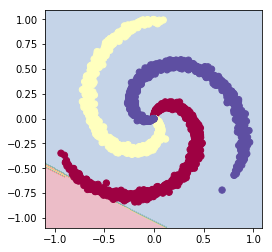

In [135]:
# Plot trained model
print(model)
plot_model(X, y, customized_network_model)

In [130]:
customized_network_model = customized_network(X_train.shape, H, C)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
from keras import metrics
customized_network_model.compile(optimizer,loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = customized_network_model.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test), shuffle=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 1s 350us/sample - loss: 5.0183 - accuracy: 0.2629 - val_loss: 3.4067 - val_accuracy: 0.2000
Epoch 2/20
2400/2400 [==============================] - 0s 62us/sample - loss: 3.3049 - accuracy: 0.2887 - val_loss: 3.4000 - val_accuracy: 0.2300
Epoch 3/20
2400/2400 [==============================] - 0s 69us/sample - loss: 3.2967 - accuracy: 0.3063 - val_loss: 3.3982 - val_accuracy: 0.3600
Epoch 4/20
2400/2400 [==============================] - 0s 67us/sample - loss: 3.2925 - accuracy: 0.3242 - val_loss: 3.3968 - val_accuracy: 0.2233
Epoch 5/20
2400/2400 [==============================] - 0s 65us/sample - loss: 3.2896 - accuracy: 0.3171 - val_loss: 3.3962 - val_accuracy: 0.2500
Epoch 6/20
2400/2400 [==============================] - 0s 66us/sample - loss: 3.2870 - accuracy: 0.3050 - val_loss: 3.3958 - val_accuracy: 0.3000
Epoch 7/20
2400/2400 [==============================] - 0s 66us/sample

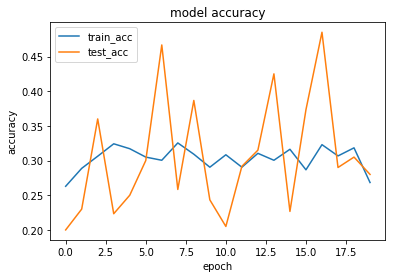

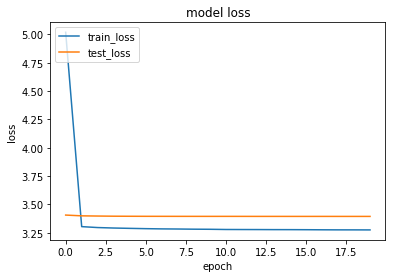

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

## Save model 

In [138]:
model.save_weights("modeltensorflow.h5")
#model.save("model_tensorflow.h5")